In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



/Users/pradyumna/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Load params from LIKE hierarchical model
Like_sufix = '_Like_FixBin5'
glam_full_like_estimates = np.load(str('CompareLikeDislike/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   


# Load params from DISLIKE hierarchical model (using inverted input [5-value])
Dislike_sufix = '_Dislike_InvInputDislike'
glam_full_dislike_estimates = np.load(str('CompareLikeDislike/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   


In [3]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_like

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,171.89,173.33,26.33,1.0,-0.52,-0.49,0.32,0.05,0.007405,0.0,1.62,1.77,1.01,0.000045,0.000051,0.000011
1,169.91,173.33,26.33,1.0,-0.03,-0.49,0.32,0.05,0.010183,0.0,1.40,1.77,1.01,0.000062,0.000051,0.000011
2,156.71,173.33,26.33,1.0,0.34,-0.49,0.32,0.05,0.008641,0.0,2.28,1.77,1.01,0.000056,0.000051,0.000011
3,176.83,173.33,26.33,1.0,-0.66,-0.49,0.32,0.05,0.007556,0.0,2.02,1.77,1.01,0.000041,0.000051,0.000011
4,101.66,173.33,26.33,1.0,-0.71,-0.49,0.32,0.05,0.007086,0.0,3.81,1.77,1.01,0.000066,0.000051,0.000011
5,119.05,173.33,26.33,1.0,-0.36,-0.49,0.32,0.05,0.007743,0.0,0.31,1.77,1.01,0.000060,0.000051,0.000011
6,167.22,173.33,26.33,1.0,-0.64,-0.49,0.32,0.05,0.010272,0.0,0.69,1.77,1.01,0.000067,0.000051,0.000011
7,163.15,173.33,26.33,1.0,-0.41,-0.49,0.32,0.05,0.008278,0.0,1.31,1.77,1.01,0.000044,0.000051,0.000011
8,177.02,173.33,26.33,1.0,-0.97,-0.49,0.32,0.05,0.008532,0.0,0.70,1.77,1.01,0.000054,0.000051,0.000011
9,173.64,173.33,26.33,1.0,-0.50,-0.49,0.32,0.05,0.008618,0.0,2.10,1.77,1.01,0.000045,0.000051,0.000011


In [4]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,180.92,195.08,21.99,1.0,-0.17,-0.45,0.38,0.05,0.005951,0.0,1.59,1.54,0.82,0.000036,0.000045,0.00001
1,193.30,195.08,21.99,1.0,-0.23,-0.45,0.38,0.05,0.010155,0.0,0.50,1.54,0.82,0.000051,0.000045,0.00001
2,183.39,195.08,21.99,1.0,0.60,-0.45,0.38,0.05,0.007977,0.0,0.79,1.54,0.82,0.000043,0.000045,0.00001
3,181.82,195.08,21.99,1.0,-0.40,-0.45,0.38,0.05,0.006621,0.0,1.60,1.54,0.82,0.000038,0.000045,0.00001
4,198.20,195.08,21.99,1.0,-0.29,-0.45,0.38,0.05,0.009696,0.0,2.14,1.54,0.82,0.000050,0.000045,0.00001
5,190.00,195.08,21.99,1.0,-0.64,-0.45,0.38,0.05,0.008312,0.0,1.16,1.54,0.82,0.000049,0.000045,0.00001
6,189.86,195.08,21.99,1.0,-0.82,-0.45,0.38,0.05,0.009953,0.0,0.97,1.54,0.82,0.000056,0.000045,0.00001
7,181.97,195.08,21.99,1.0,-0.44,-0.45,0.38,0.05,0.006830,0.0,1.82,1.54,0.82,0.000042,0.000045,0.00001
8,185.33,195.08,21.99,1.0,-0.93,-0.45,0.38,0.05,0.009034,0.0,1.58,1.54,0.82,0.000047,0.000045,0.00001
9,146.94,195.08,21.99,1.0,-0.81,-0.45,0.38,0.05,0.008579,0.0,2.73,1.54,0.82,0.000050,0.000045,0.00001


In [5]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  -19.69727272727266 ; p-value =0.0010840268758175204
Gamma: [Like - Dislike] =  -0.033636363636363686 ; p-value =0.42569799997114255
Tau: [Like - Dislike] =  0.1960606060606056 ; p-value =0.23302215297526588
V: [Like - Dislike] =  5.484848484848479e-06 ; p-value =0.0001046345743680702
S: [Like - Dislike] =  -0.000168999999999999 ; p-value =0.40521298158424457


([<matplotlib.axis.XTick at 0x1c1c235eb8>,
 <a list of 2 Text xticklabel objects>)

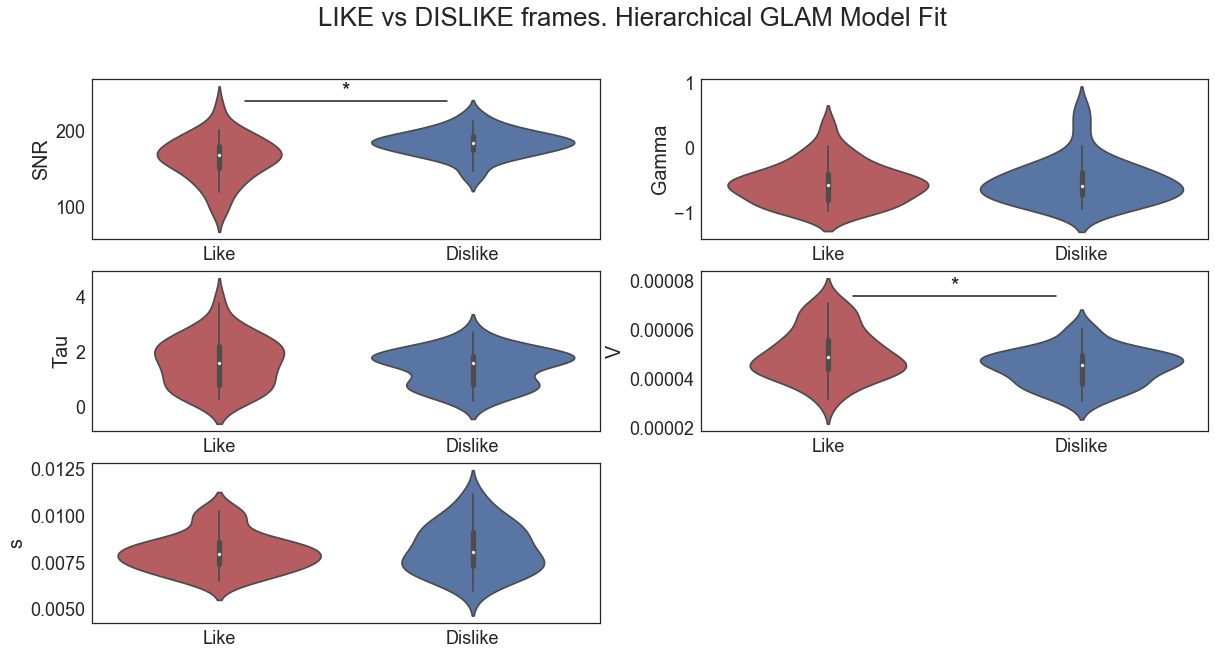

In [6]:
f = plt.figure(figsize=(20,10))
sns.set(style='white', font_scale=1.8)
plt.suptitle('LIKE vs DISLIKE frames. Hierarchical GLAM Model Fit')

my_pal = {"r" ,"b"}

plt.subplot(321)

# FOR SNR
all_arr = [params_part_like.SNR,
          params_part_dislike.SNR]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='SNR')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.SNR.max(), params_part_dislike.SNR.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR gamma
plt.subplot(322)
all_arr1 = [params_part_like.gamma,
            params_part_dislike.gamma]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='Gamma')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR tau
plt.subplot(323)
all_arr1 = [params_part_like.tau,
            params_part_dislike.tau]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='Tau')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# FOR v
plt.subplot(324)
all_arr1 = [params_part_like.v,
            params_part_dislike.v]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='V')
plt.xticks([0, 1,], ['Like', 'Dislike'])

# Add asterisk
x1, x2 = 0, 1   
y_max = max([params_part_like.v.max(), params_part_dislike.v.max()])
y, h, col = y_max + y_max/50, y_max/50, 'k'
plt.plot( [x1+0.1, x2-0.1], [ y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

# FOR s
plt.subplot(325)
all_arr1 = [params_part_like.s,
            params_part_dislike.s]
bplot = sns.violinplot(data=all_arr1, palette=my_pal).set(ylabel='s')
plt.xticks([0, 1,], ['Like', 'Dislike'])
